#CIC260 - Inteligência Artificial

##Tales Oliveira
##Tarefa 05

###============================================================================================
###Importando a biblioteca numérica numpy

In [20]:
import numpy as np 

###Definindo a classe Perceptron

In [21]:
class Perceptron(object):
    def __init__(self, tAprendizagem=0.01, nIteracoes=50, random_state=1):
        self.tAprendizagem = tAprendizagem
        self.nIteracoes = nIteracoes
        self.random_state = random_state

    # Função para o aprendizado a partir do número de amostras e número de atributos do conjunto     
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.nIteracoes):
            errors = 0
            for xi, target in zip(X, y):
                update = self.tAprendizagem * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # Função para calcular a entrada
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Função para obter o rótulo da classe utilizando função degrau
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

###============================================================================================

### A biblioteca pandas é utilizada para o armazenamento de dados tabulados da base de dados Iris.


In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # A base de dados é lida
df.tail() # O final do conjunto é exibido

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


###============================================================================================

### A biblioteca matplotlib é utilizada para visualizar parte do conjunto de dados.

In [22]:
import matplotlib.pyplot as plt

In [23]:
y = df.iloc[0:100, 4].values 
# Vamos convertes os valores das classes em valores 1 ou -1.
# A classe 'Iris-setosa' será -1 e o restante 1
y = np.where(y == 'Iris-setosa', -1, 1)

In [24]:
X = df.iloc[0:100, [0,2]].values

### Exibindo a distribuição dos valores obtidos.

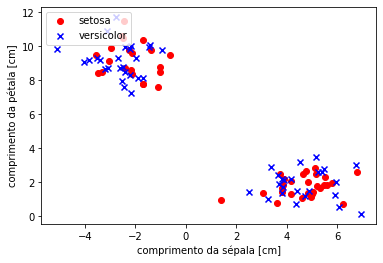

In [15]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('comprimento da sépala [cm]')
plt.ylabel('comprimento da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

In [16]:
ppn = Perceptron(tAprendizagem=0.1, nIteracoes=10)
ppn.fit(X, y) ## Chamada do método que faz o treino, passando as entradas (X) e suas respectivas saídas (y)

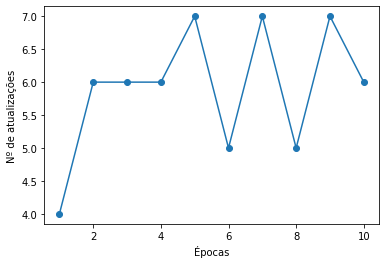

In [17]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

###============================================================================================

In [18]:
# Importamos a biblioteca
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


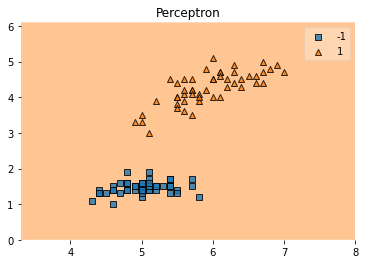

In [25]:
# Plotamos o gráfico
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

###============================================================================================

###SCIKIT

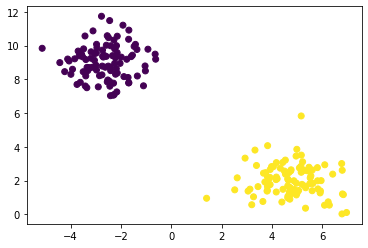

In [ ]:
from sklearn.datasets import make_blobs
# Vamos criar 2 blobs com 200 amostras e 2 dimensões e 2 centros.
blobs = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)
# Em seguida, vamos plotar os dados gerados para visualização.
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

In [26]:
ppn = Perceptron(nIteracoes=10, tAprendizagem=0.02)
X = blobs[0] # Entrada de dados
y = blobs[1] # Saída
# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y) # Treinar